# Documentation of computer vision utilities
___

## Path and directories
___

In [140]:
import os

current_dir = os.path.dirname(os.path.abspath('__file__'))  # current directory
img_dir = os.path.join(current_dir, 'img') # sample image directory

puppy_path = os.path.join(img_dir, 'puppy.jpg') # path to puppy image
graypuppy_path = os.path.join(img_dir, 'graypuppy.jpg' )

## Libraries
___

In [141]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

## Utilities


### Read image
___

In [142]:
def read_img(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

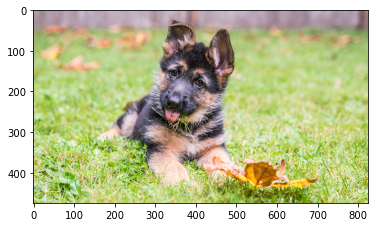

In [143]:
# test on color image
puppy_img = read_img(puppy_path)
plt.imshow(puppy_img)
plt.show()

### View image
___

In [144]:
# auxiliary function to reshape a 1-channel image to 3 identical channels
# while keeping the same image data type
def reshape_2D_img(img):
    if len(img.shape)==2:
        height, width = img.shape # get image dimension
        img_type = img.dtype # get image type
        
        reshaped_img = np.zeros(shape=(height, width, 3),
                             dtype=img_type) # initialize reshaped image
        for channel in range(3):
            reshaped_img[:,:,channel] = img
        
        return reshaped_img
    else:
        pass
    
def view_img(img):
    if len(img.shape)==3:
        plt.imshow(img)
        plt.show()
    elif len(img.shape)==2:
        reshaped_img = reshape_2D_img(img)
        plt.imshow(reshaped_img)
        plt.show()
                

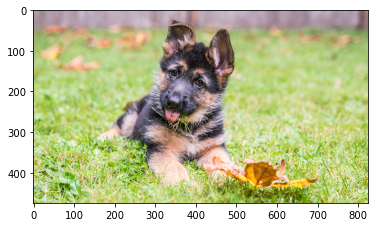

In [145]:
# test on color image
puppy_img = read_img(puppy_path)
view_img(puppy_img)

Size of the grayscale image:  (475, 825)
Size of the original color image:  (475, 825, 3)
Type of the original color image:  uint8
Type of the grayscale image:  uint8


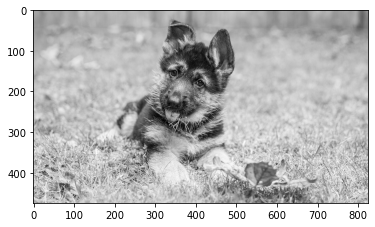

In [146]:
# test on two-dimensional grayscale image
puppy_gray_img = cv.imread(puppy_path, cv.IMREAD_GRAYSCALE)
print("Size of the grayscale image: ", puppy_gray_img.shape)
print("Size of the original color image: ", cv.imread(puppy_path).shape)
print("Type of the original color image: ", cv.imread(puppy_path).dtype)
print("Type of the grayscale image: ", puppy_gray_img.dtype)
view_img(puppy_gray_img)

### Convert to grayscale image

In [147]:
# By default, final image is reshaped to three identical channels
def convert_to_gray(img, reshape=True):
    if reshape==True:
        reshaped_img = reshape_2D_img(cv.cvtColor(img, cv.COLOR_RGB2GRAY))
        return reshaped_img
    else:
        return cv.cvtColor(img, cv.COLOR_RGB2GRAY)

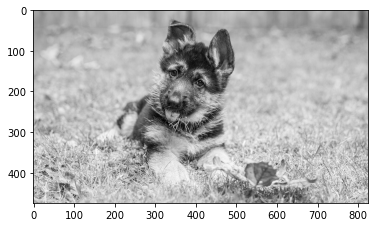

Type of original image:  uint8
Type of grayscale image:  uint8
Shape of original image:  (475, 825, 3)
Shape of grayscale image:  (475, 825, 3)


In [148]:
# test on color image, final image reshaped 
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
view_img(puppy_gray_img)
print("Type of original image: ", puppy_img.dtype)
print("Type of grayscale image: ", puppy_gray_img.dtype)
print("Shape of original image: ", puppy_img.shape)
print("Shape of grayscale image: ", puppy_gray_img.shape)

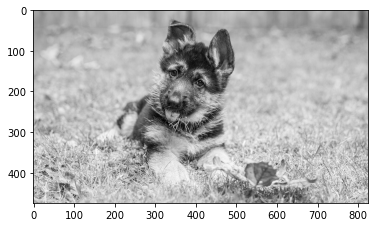

Type of original image:  uint8
Type of grayscale image:  uint8
Size of original image:  (475, 825, 3)
Size of grayscale image:  (475, 825)


In [149]:
# test on color image, final image not reshaped
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=False)
view_img(puppy_gray_img)
print("Type of original image: ", puppy_img.dtype)
print("Type of grayscale image: ", puppy_gray_img.dtype)
print("Size of original image: ", puppy_img.shape)
print("Size of grayscale image: ", puppy_gray_img.shape)

### Get image type

In [150]:
def get_type(img):
    return img.dtype

In [151]:
# test on color image
puppy_img = read_img(puppy_path)
print("Type of puppy image: ", get_type(puppy_img))

Type of puppy image:  uint8


### Get image shape

In [152]:
def get_shape(img):
    return img.shape

In [153]:
# test on color image
puppy_img = read_img(puppy_path)
print("Shape of puppy image: ", get_shape(puppy_img))

Shape of puppy image:  (475, 825, 3)


In [154]:
# test on grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=False)
print("Shape of grayscale puppy image: ", get_shape(puppy_gray_img))

Shape of grayscale puppy image:  (475, 825)


In [155]:
# test on grayscale image (reshape)
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
print("Shape of grayscale puppy image: ", get_shape(puppy_gray_img))

Shape of grayscale puppy image:  (475, 825, 3)


### Convert to float

In [156]:
def convert_to_float(img):
    img = img.astype(np.float64)
    
    total_channel = len(img.shape)
    for channel in range(total_channel):
        img[:,:,channel] = img[:,:,channel]/np.max(img[:,:,channel])
    return img

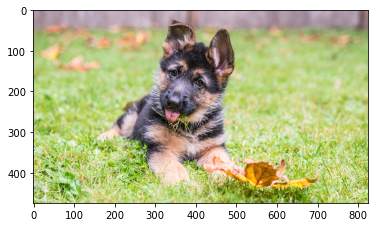

Range of pixel values: 0.00 to 1.00
Image data type:  float64


In [160]:
# test on color image
puppy_img = read_img(puppy_path)
puppy_img_float = convert_to_float(puppy_img)
view_img(puppy_img_float)
print("Range of pixel values: {:.2f} to {:.2f}".format(np.min(puppy_img_float),
                                                      np.max(puppy_img_float)))
print("Image data type: ", get_type(puppy_img_float))

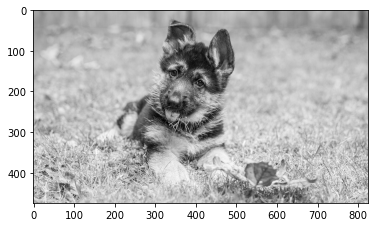

Range of pixel values: 0.00 to 1.00 
Image data type:  float64


In [161]:
# test on grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img)
puppy_gray_float_img = convert_to_float(puppy_gray_img)
view_img(puppy_gray_float_img)
print("Range of pixel values: {:.2f} to {:.2f} ".
     format(np.min(puppy_gray_float_img),
           np.max(puppy_gray_float_img)))
print("Image data type: ", get_type(puppy_gray_float_img))

### Draw rectangle on image

In [162]:
def draw_rectangle(img, pt1, pt2, color=None, thickness=None):
    if color is None:
        color = (255,0,0)
    
    if thickness is None:
        thickness = 5
    
    cv.rectangle(img, pt1=pt1, pt2=pt2, color=color, thickness=thickness)
    return img

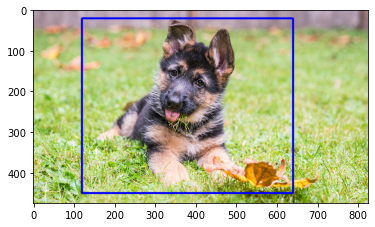

In [173]:
# test on color image
puppy_img = read_img(puppy_path)
puppy_img_rec = draw_rectangle(puppy_img, (120,450), (640, 20), 
                               color=(0,0,255), thickness=4)
view_img(puppy_img_rec)

### Crop image

In [186]:
def crop(img, pt1, pt2):
    
    pt1_x, pt1_y = pt1
    pt2_x, pt2_y = pt2
    
    Xstart, Xend = min(pt1_x, pt2_x), max(pt1_x, pt2_x)
    Ystart, Yend = min(pt1_y, pt2_y), max(pt1_y, pt2_y)
    
    if len(img.shape)==3:
        return img[Ystart:Yend+1, Xstart:Xend+1, :]
    elif len(img.shape)==2:
        return img[Ystart:Yend+1, Xstart:Xend+1]

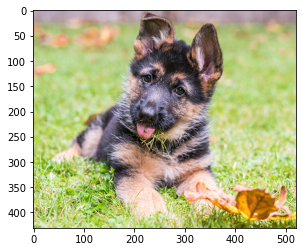

In [185]:
# test on color image
puppy_img = read_img(puppy_path)
cropped_puppy = crop(puppy_img, (120,450), (640,20))
view_img(cropped_puppy)

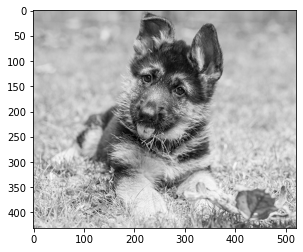

In [188]:
# test on non-reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img)
cropped_gray_puppy = crop(puppy_gray_img, (120,450), (640,20))
view_img(cropped_gray_puppy)